<a href="https://colab.research.google.com/github/Vaycold/Python_ML/blob/main/Clustering/E-commerce%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-Commerce 
_____________

## Load the data

In [112]:
# Install the package
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings(action = 'ignore')
pd.set_option('display.max_columns', None)

In [113]:
# data url
user_meta_url = 'https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_meta_data.csv'
user_statsdata_url = 'https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_stats_data.csv'

user_meta_df = pd.read_csv(user_meta_url, parse_dates=[0])
user_stats_df = pd.read_csv(user_statsdata_url, parse_dates=[0])

     Meta Data
      - user_id         : 고객 고유 ID
      - sex             : 성별(남0, 여1)
      - birthday_year   : 생일년도(yyyy)
      - membership_type : 멤버쉽타입(100 : 비회원, 300. 500: 정회원)
      - category_prefer : 카테고리 선호 입력수
      - joined_date     : 가입일자(yyyy-mm-dd)
      - deleted_date    : 탈퇴일자(yyyy-mm-dd)
      - join_path       : 가입경로(None 일반가입, 1: sns가입)
      - os              : (IOS ,AOS)
      - recommended_cnt : 친구추천 수

In [114]:
# Data shape
print(user_meta_df.shape)
print(user_stats_df.shape)

(3412, 10)
(3412, 11)


In [115]:
user_meta_df.head(2)

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1


In [116]:
user_stats_df.head(2)

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.0,1.0,23800.0,0.0,2020-04-05
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.0,1.0,23000.0,10000.0,2020-01-17


In [117]:
# 컬럼 데이터 타입을 확인해보자
user_meta_df.dtypes

user_id             object
sex                  int64
birthday_year        int64
membership_type      int64
category_prefer      int64
joined_date         object
deleted_date        object
join_path          float64
os                  object
recommended_cnt      int64
dtype: object

In [118]:
# 고객의 나이정보 생성
this_year = 2021
user_meta_df['age'] =this_year - user_meta_df['birthday_year'] + 1
user_meta_df.head(2)

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4,27
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1,27


In [119]:
# 가입일자를 사용하여 2021년 1월 1일 기준 고객의 가입 기간을 생성해보자
today_ymd = datetime(2021, 1, 1)
user_meta_df['joined_date'] = user_meta_df['joined_date'].astype('datetime64[ns]')

user_meta_df['days_from_joined'] = (today_ymd - user_meta_df['joined_date']).dt.days # 가입기간을 일로 바꾸기
user_meta_df['years_from_joined'] = (today_ymd - user_meta_df['joined_date']) / np.timedelta64(1, 'Y')
user_meta_df['years_from_joined'] = user_meta_df['years_from_joined'].round(1)
user_meta_df.head()


,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4,27,480,1.3
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1,27,263,0.7
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,NaN,AOS,6,23,745,2.0
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,NaN,AOS,2,24,716,2.0
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,NaN,AOS,2,23,422,1.2


In [120]:
# 탈퇴 일자를 사용하여 2021년 1월 1일 기준 고객의 탈퇴 여부를 binary로 나타내보자.
user_meta_df['if_deleted'] = np.where(user_meta_df['deleted_date'] == 'NaT', 0, 1) # 1: 탈퇴함, 0 : 탈퇴하지 않음


In [121]:
user_meta_df.head()

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4,27,480,1.3,0
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1,27,263,0.7,0
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,NaN,AOS,6,23,745,2.0,0
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,NaN,AOS,2,24,716,2.0,0
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,NaN,AOS,2,23,422,1.2,0


     Stats Data
      - user_id          : 고객 고유 ID
      - membership_type  : 멤버쉽타입(100 : 비회원, 300. 500: 정회원)
      - total_order_cnt  : 총 거래 건수
      - total_cost       : 총 거래 금액      
      - avg_coupon_amt   : 평균 쿠폰 사용 금액
      - avg_point_amt    : 평균 포인트사용 금액
      - weekly_order_cnt : 주평균 거래 건수
      - monthly_order_cnt: 월평균 거래 건수
      - avg_cost         : 평균 거래 금액
      - avg_item_cost    : 평균 상품 금액
      - last_date        : 마지막 거래 일자 (yyyy-mm-dd)

In [122]:
user_stats_df.dtypes

user_id               object
membership_type        int64
total_order_cnt      float64
total_cost           float64
avg_coupon_amt       float64
avg_point_amt        float64
weekly_order_cnt     float64
monthly_order_cnt    float64
avg_cost             float64
avg_item_cost        float64
last_date             object
dtype: object

In [123]:
user_stats_df.last_date.min(), user_stats_df.last_date.max()

('2020-01-01', '2020-06-30')

In [124]:
# 마지막 거래일자의 가장 오래된 날짜를 선택하여 Recency의 정도를 알아보는 컬럼을 생성해보자
# 기준점이 마지막 거래일자 직전일이 됨.
oldest_ymd = datetime(2019,12,31)

user_stats_df['last_date'] = user_stats_df['last_date'].astype('datetime64[ns]')
user_stats_df['days_of_recency'] = (user_stats_df['last_date'] - oldest_ymd).dt.days

In [125]:
user_stats_df.head()

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.000,1.00,23800.00,0.00,2020-04-05,96
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.000,1.00,23000.00,10000.00,2020-01-17,17
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.000,1.00,24000.00,24000.00,2020-05-15,136
3,EoRzAGlei59fugN,100,1.0,22000.0,-5000.0,0.0,1.000,1.00,22000.00,14000.00,2020-03-02,62
4,zgQJlOYlFURl6ev,300,19.0,561200.0,0.0,0.0,2.375,4.75,29536.84,24615.79,2020-06-23,175


## 고객데이터 EDA


In [126]:
# 1. 컬럼별 Null 값이 있는가?

user_meta_df.isna().sum()
# user_meta_df.isnull().sum(axis=0) 같은방법

user_id                 0
sex                     0
birthday_year           0
membership_type         0
category_prefer         0
joined_date             0
deleted_date            0
join_path            2888
os                      0
recommended_cnt         0
age                     0
days_from_joined        0
years_from_joined       0
if_deleted              0
dtype: int64

In [127]:
# join path 는 위에서 보면 알 수 있듯이 null값은 일반가입을 의미함
# 그래서 채워주기로 하자.
user_meta_df['join_path'] = user_meta_df['join_path'].fillna(0)

In [128]:
# 2. 고객 메타 데이터는 user_id 기준으로 unique 해야 되기 때문에 중복 데이터를 확인하자
user_meta_df[user_meta_df.duplicated(['user_id'])]

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted


In [129]:
# 중복데이터가 있다면 지우자.
user_meta_df.drop_duplicates(subset='user_id')

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,0.0,AOS,4,27,480,1.3,0
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,0.0,AOS,1,27,263,0.7,0
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,0.0,AOS,6,23,745,2.0,0
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,0.0,AOS,2,24,716,2.0,0
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,0.0,AOS,2,23,422,1.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3407,K0qchcNENCEDzPH,1,1995,100,5,2019-02-08,NaT,0.0,AOS,3,27,693,1.9,0
3408,EgkSw32Hq7ueGrf,0,1981,100,0,2019-09-05,NaT,0.0,AOS,0,41,484,1.3,0
3409,wvzkibB8S2Oth9b,0,1978,100,0,2017-10-16,NaT,0.0,AOS,0,44,1173,3.2,0
3410,8WI83Ev0nnBfMB7,1,1988,100,8,2017-12-06,NaT,0.0,AOS,0,34,1122,3.1,0


In [130]:
# 멤버쉽 타입별 분포를 확인해보자.

type(user_meta_df.groupby(['membership_type'])[['user_id']].count()) # 대괄호 안에 두개 안에 넣으면 dataframe

pandas.core.frame.DataFrame

In [131]:
type(user_meta_df.groupby(['membership_type'])['user_id'].count()) # 하나만 넣으면 series임.

pandas.core.series.Series

In [132]:
user_meta_df.groupby(['membership_type'])[['user_id']].count()

,user_id
membership_type,
100,2667
300,513
400,126
500,106


In [133]:
user_meta_df.columns

Index(['user_id', 'sex', 'birthday_year', 'membership_type', 'category_prefer',
       'joined_date', 'deleted_date', 'join_path', 'os', 'recommended_cnt',
       'age', 'days_from_joined', 'years_from_joined', 'if_deleted'],
      dtype='object')

In [134]:
# 가입기간에 따른 고객 분포 
user_ct_from_join = user_meta_df.groupby(['years_from_joined'])[['user_id']].count().reset_index()
user_ct_from_join[:10]

,years_from_joined,user_id
0,0.0,64
1,0.1,102
2,0.2,112
3,0.3,128
4,0.4,100
5,0.5,92
6,0.6,119
7,0.7,101
8,0.8,84
9,0.9,118


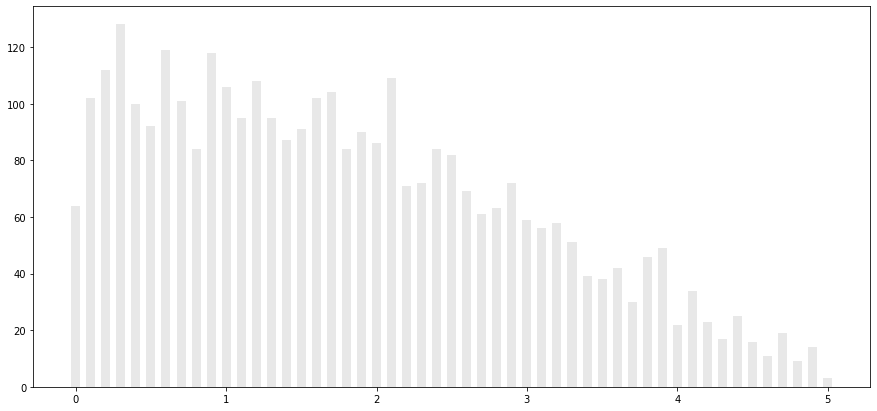

In [135]:
plt.figure(figsize=(15,7))
plt.bar(user_ct_from_join.years_from_joined, user_ct_from_join.user_id,
        width=0.06, alpha=0.09, color='black')
plt.show()


In [136]:
fig  = px.bar(user_ct_from_join,
              x = 'years_from_joined',
              y = 'user_id')
fig.update_layout(height = 500, width = 1000)
fig.show()

# 최근 가입한 유저가 많음.

In [137]:
# 카테고리 선호 입력 수에 따른 고객 분포 확인
user_ct_from_ctg = user_meta_df.groupby(['category_prefer'])[['user_id']].count().reset_index()
fig  = px.bar(user_ct_from_ctg,
              x = 'category_prefer',
              y = 'user_id')
fig.update_layout(height = 500, width = 1000)
fig.show()

In [138]:
user_meta_df.columns

Index(['user_id', 'sex', 'birthday_year', 'membership_type', 'category_prefer',
       'joined_date', 'deleted_date', 'join_path', 'os', 'recommended_cnt',
       'age', 'days_from_joined', 'years_from_joined', 'if_deleted'],
      dtype='object')

In [139]:
# 친구 추천 횟수에 따른 고객 분포 확인
user_ct_from_rcm = user_meta_df.groupby(['recommended_cnt'])[['user_id']].count().reset_index()
fig  = px.bar(user_ct_from_rcm,
              x = 'recommended_cnt',
              y = 'user_id')
fig.update_layout(height = 500, width = 1000)
fig.show()

In [141]:
# 변수간 상관관계 살펴보기
corr_matrix = user_meta_df.corr()

In [144]:
corr_matrix[abs(corr_matrix>=0.5)]

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
sex,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birthday_year,NaN,1.000000,NaN,0.504292,NaN,NaN,NaN,NaN,NaN,NaN
membership_type,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_prefer,NaN,0.504292,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
join_path,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
recommended_cnt,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
days_from_joined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.999718,NaN
years_from_joined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999718,1.000000,NaN
if_deleted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [146]:
# 히트맵으로 봐보자
corr_matrix.style.background_gradient()

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
sex,1.000000,-0.005282,0.001593,-0.006267,-0.017552,-0.013729,0.005282,-0.016833,-0.016351,0.001651
birthday_year,-0.005282,1.000000,-0.069491,0.504292,0.009461,0.258950,-1.000000,-0.138338,-0.138318,0.021408
membership_type,0.001593,-0.069491,1.000000,-0.053046,0.019963,-0.021604,0.069491,0.037165,0.036992,0.009109
category_prefer,-0.006267,0.504292,-0.053046,1.000000,0.002226,0.171625,-0.504292,-0.007478,-0.007576,0.013642
join_path,-0.017552,0.009461,0.019963,0.002226,1.000000,0.006406,-0.009461,-0.064171,-0.063883,-0.020725
recommended_cnt,-0.013729,0.258950,-0.021604,0.171625,0.006406,1.000000,-0.258950,0.186742,0.187304,0.009055
age,0.005282,-1.000000,0.069491,-0.504292,-0.009461,-0.258950,1.000000,0.138338,0.138318,-0.021408
days_from_joined,-0.016833,-0.138338,0.037165,-0.007478,-0.064171,0.186742,0.138338,1.000000,0.999718,-0.010898
years_from_joined,-0.016351,-0.138318,0.036992,-0.007576,-0.063883,0.187304,0.138318,0.999718,1.000000,-0.011358
if_deleted,0.001651,0.021408,0.009109,0.013642,-0.020725,0.009055,-0.021408,-0.010898,-0.011358,1.000000


In [148]:
# age와 recommend의 상관관계를 봐보자

fig = px.scatter(x = user_meta_df['age'],
                 y = user_meta_df['category_prefer'])
fig.update_layout(width = 600, height = 500)
fig.show()

In [149]:
fig = px.scatter(x = user_meta_df['age'],
                 y = user_meta_df['recommended_cnt'])
fig.update_layout(width = 600, height = 500)
fig.show()

In [150]:
user_meta_df.pivot_table(
    values = 'user_id',
    index = 'sex',
    columns = 'join_path',
    aggfunc = 'count'
)

join_path,0.0,1.0
sex,,
0,1253,240
1,1635,284


## Data Cleansing

In [152]:
# numeric type 만 남기기
numerics_types = ['int64' , 'int32', 'int16', 'float64', 'float32','float16']
user_numeric_df = user_meta_df.select_dtypes(include=numerics_types)
user_numeric_df.head()

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
0,0,1995,300,3,0.0,4,27,480,1.3,0
1,1,1995,300,2,0.0,1,27,263,0.7,0
2,1,1999,300,4,0.0,6,23,745,2.0,0
3,0,1998,300,7,0.0,2,24,716,2.0,0
4,1,1999,300,6,0.0,2,23,422,1.2,0


In [156]:
# Binary 변수 제거 하자
user_binary_cols = [col for col in user_numeric_df if np.isin(user_numeric_df[col].unique(), [0,1]).all()] # np.isin 이 안에 값이 해당하는 지 묻는 함수 
user_numeric_df.drop(user_binary_cols, axis=1, inplace=True)
user_numeric_df.head(2)

,birthday_year,membership_type,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1995,300,3,4,27,480,1.3
1,1995,300,2,1,27,263,0.7


In [157]:
# 멤버쉽 변수 분리

user_x_cols = list(user_numeric_df.columns)
user_x_cols.remove('membership_type')
user_x_cols


['birthday_year',
 'category_prefer',
 'recommended_cnt',
 'age',
 'days_from_joined',
 'years_from_joined']

In [160]:
user_numeric_df.describe()

,birthday_year,membership_type,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
count,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000
mean,1990.516706,153.575615,4.596717,2.291325,31.483294,659.414127,1.805158
std,7.669478,106.964154,3.403961,2.455373,7.669478,443.232127,1.214158
min,1967.000000,100.000000,0.000000,0.000000,16.000000,1.000000,0.000000
25%,1986.000000,100.000000,2.000000,0.000000,26.000000,290.750000,0.800000
50%,1993.000000,100.000000,4.000000,2.000000,29.000000,603.000000,1.700000
75%,1996.000000,100.000000,7.000000,4.000000,36.000000,969.000000,2.700000
max,2006.000000,500.000000,17.000000,21.000000,55.000000,1817.000000,5.000000


## Split the data

In [163]:
x = user_numeric_df[user_x_cols]
y = user_numeric_df['membership_type']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)
print(len(train_x), len(test_x))

2729 683


## Clustering

### K-means

In [169]:
# import the module.
from sklearn.cluster import KMeans

# Find the best k using for elbow method

distortions = []
k_range = range(1,11)
for n in k_range :
    km = KMeans(n_clusters = n, random_state = 42)
    km.fit(train_x)
    distortions.append(km.inertia_.round(2))

In [170]:
distortions

[531710786.15,
 154425721.7,
 71864103.05,
 41572341.05,
 26563580.19,
 19226206.52,
 14303216.61,
 10861102.51,
 8459378.56,
 6914963.54]

In [174]:
fig = px.line(x = k_range,
              y = distortions,
              labels = {'x' : 'k', 'y' : 'distortions'}) # x축 y 축 이름 정하기
fig.update_layout(width = 700, height = 400)
fig.show()

In [175]:
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(train_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
# 훈련된 결과 확인해보기